# Brazilian E-Commerce Public Dataset 

#### Team Members: 
    + 1- Salma Maged 205105 
    + 2- Osama Abushama 205076
    + 3- Elsayed Mohamed 205038
#### Under supervision of Dr.Esraa A.Afify

## Table of Contents

1.0 Data loading

2.0 Exploratory Data Analysis (EDA)

        2.1 Read Head Of Data   

        2.2 Merging ALL Dataframes
        
        2.3 Show All Features
        
        2.4 Check duplicate

3.0 Data Cleaning

        3.1 Handling Missing Values

        3.2 Feature Engineering

4.0 Data Visualization
 
    
5.0 - Data preprocesing

        5.1 Drop Unneccessary Features

        5.2 Feature Selection

        5.3 Feature Scaling
        
        5.4 Handling Imbalance
        
6.0 - Modeling

        6.1 Apply ML models

7.0 - Model Evaluation

# Reference for Dataset

##### https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# Import needed library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing Classifier Modules
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  average_precision_score, precision_recall_curve
import itertools 

# 1.0 Data Loading

### Read All Datasets

In [2]:
customers_df= pd.read_csv('D:/Datasets/olist_customers_dataset.csv')
geolocation_df= pd.read_csv('D:/Datasets/olist_geolocation_dataset.csv')
items_df= pd.read_csv('D:/Datasets/olist_order_items_dataset.csv')
payments_df= pd.read_csv('D:/Datasets/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('D:/Datasets/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('D:/Datasets/olist_orders_dataset.csv')
products_df= pd.read_csv('D:Datasets/olist_products_dataset.csv')
sellers_df= pd.read_csv('D:/Datasets/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('D:/Datasets/product_category_name_translation.csv')

# 2.0 Exploratory Data Analysis ( EDA )

### 2.1 View Sample of data from all datasets 

#### CUSTOMER DATASET
- "This dataset has information about the customer and its location . Use it to identify unique customers in the orders dataset and to find the orders delivery location."

##### customer id col:
- key to the orders dataset. Each order has a unique customer_id.

##### customer_unique:
- unique identifier of a customer.

##### customer_zip_cod:
- irst five digits of customer zip code

##### customer_city:
- customer city name

##### customer_state:
- customer state name

#### View Sample of  "Customers" Data , Showing the first 5 rows where the default is 5 rows

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# 

#### Geolocation Dataset
- "This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers."

##### geolocation_zip_code_prefix:
- first 5 digits of zip code

##### geolocation_lat:
- latitude

##### geolocation_lng:
- longitude

##### geolocation_city:
- city name

##### geolocation_state:
- state

#### View Sample of "geolocation" Data , Showing the first 5 rows where the default is 5 rows

In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


# 

#### Order Items Dataset
- "This dataset includes data about the items purchased within each order."

##### order_id:
- order unique identifier

##### order_item_id:
- sequential number identifying number of items included in the same order.

##### product_id:
- product unique identifier

##### seller_id:
- seller unique identifier

##### shipping_limit_date:
- Shows the seller shipping limit date for handling the order over to the logistic partner.

##### price:
- item price

##### freight_value:
- item freight value item (if an order has more than one item the freight value is splitted between items)


#### View Sample of "items" Data ,Showing the first 5 rows where the default is 5 rows

In [5]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# 

#### Payments Dataset
- "This dataset includes data about the orders payment options."

##### order_id:
- unique identifier of an order.

##### payment_sequential:
- a customer may pay an order with more than one payment method. If he does so, a sequence will be created to 

##### payment_type:
- method of payment chosen by the customer.

##### payment_installments:
- number of installments chosen by the customer.

##### payment_value:
- transaction value.

#### View Sample of "payments"Data , Showing the first 5 rows where the default is 5 rows

In [6]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# 

#### Order Reviews Dataset
- "This dataset includes data about the reviews made by the customers."

##### review_id:
- unique review identifier

##### order_id:
- unique order identifier

##### review_score:
- Note ranging from 1 to 5 given by the customer on a satisfaction survey.

##### review_comment_title:
- Comment title from the review left by the customer, in Portuguese.

##### review_comment_message:
- Comment message from the review left by the customer, in Portuguese.

##### review_creation_date:
- Shows the date in which the satisfaction survey was sent to the customer.

##### review_answer_timestamp:
- Shows satisfaction survey answer timestamp.

#### View Sample of "reviews"Data , Showing the first 5 rows where the default is 5 rows

In [7]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# 

#### Order Dataset
- "This is the core dataset. From each order you might find all other information."

##### order_id:
- unique identifier of the order.

##### customer_id:
- key to the customer dataset. Each order has a unique customer_id.

##### order_status:
- Reference to the order status (delivered, shipped, etc).

##### order_purchase_timestamp:
- Shows the purchase timestamp.

##### order_approved_at:
- Shows the payment approval timestamp.

##### order_delivered_carrier_date:
- Shows the order posting timestamp. When it was handled to the logistic partner.

##### order_delivered_customer_date:
- Shows the actual order delivery date to the customer.

##### order_estimated_delivery_date:
- Shows the estimated delivery date that was informed to customer at the purchase moment.


#### View Sample of  "orders"Data , Showing the first 5 rows where the default is 5 rows

In [8]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# 

#### Products Dataset
- "This dataset includes data about the products sold by Olist."

##### product_id:
- unique product identifier

##### product_category_name:
- root category of product, in Portuguese.

##### product_name_lenght:
- number of characters extracted from the product name.

##### product_description_lenght
- number of characters extracted from the product description.

##### product_photos_qty:
- number of product published photos

##### product_weight_g:
- product weight measured in grams.

##### product_length_cm:
- product length measured in centimeters.

##### product_height_cm:
- product height measured in centimeters.
##### product_width_cm:
- product width measured in centimeters.

#### View Sample of  "Products"Data , Showing the first 5 rows where the default is 5 rows

In [9]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# 

#### Sellers Dataset
- "This dataset includes data about the sellers that fulfilled orders made at Olist.  Use it to find the seller location and to identify which seller fulfilled each product."

##### seller_id:
- seller unique identifier

##### seller_zip_code_pre:
- fixfirst 5 digits of seller zip code

##### seller_city:
- seller city name

##### seller_state:
- seller state

#### View Sample of  "Sellers"Data , Showing the first 5 rows where the default is 5 rows

In [10]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# 

#### Category Name Translation
- "Translates the product_category_name to english."

##### product_category_name:
- category name in Portuguese

##### product_category_name_english:
- category name in English

#### View Sample of  "Category_translation"Data , Showing the first 5 rows where the default is 5 rows

In [11]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 

### 2.2 Merging All Dataframes

#### Merging all Datasets togather in one variable called df according to id's 

In [12]:
#Merging according ID
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(items_df, on="order_id", how='inner')
df= df.merge(payments_df, on="order_id", how='inner')
df= df.merge(reviews_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(category_translation_df, on='product_category_name', how='inner')
df.shape

(115609, 40)

# 

### 2.3 Show All Features

#### View all columns name in list

In [13]:
list(df.columns)

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'product_category_name_english']

# 

### 2.4 Check duplicates

#### Check there any duplicate and the sum of duplicates

In [14]:
df.duplicated().sum()

0

#### Check the Summary and understanding the data for only numerical 

In [15]:
df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,1.093747,2.946233,172.387379,4.034409,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,24515.713958
std,29841.671732,0.685926,182.653476,15.836184,0.729849,2.781087,265.873969,1.385584,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,27636.640968
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11310.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24241.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.050000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58745.000000,1.000000,134.900000,21.210000,1.000000,4.000000,189.480000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28605.000000
max,99980.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


#### Check the Summary and understanding the data for categorical

In [16]:
df.describe(include="O")

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,payment_type,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,seller_city,seller_state,product_category_name_english
count,115609,115609,115609,115609,115609,115609,115609,115595,114414,113209,...,115609,115609,13801,48906,115609,115609,115609,115609,115609,115609
unique,96516,93396,4093,27,96516,7,95989,88332,79241,93702,...,4,96319,4477,35176,632,96163,71,604,23,71
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,...,credit_card,eef5dbca8d37dfce6db7d7b16dd0525e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,sao paulo,SP,bed_bath_table
freq,63,75,18267,48797,63,113210,63,63,63,63,...,85278,63,489,253,531,63,11847,28811,82417,11847


#### Check the Summary and understanding the data for numerical and categorical (both) 

In [17]:
df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
count,115609,115609,115609.000000,115609,115609,115609,115609,115609,115595,114414,...,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609,115609,115609
unique,96516,93396,NaN,4093,27,96516,7,95989,88332,79241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604,23,71
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,bed_bath_table
freq,63,75,NaN,18267,48797,63,113210,63,63,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28811,82417,11847
mean,NaN,NaN,35061.537597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,24515.713958,NaN,NaN,NaN
std,NaN,NaN,29841.671732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,27636.640968,NaN,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,NaN,NaN,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,NaN,NaN,NaN
50%,NaN,NaN,24241.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,NaN,NaN,NaN
75%,NaN,NaN,58745.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28605.000000,NaN,NaN,NaN


#### Overview of data , Showing the columns name and data type of each column

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

#### Check the type of the coiumns 

In [19]:
df.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_comment_t

# 

# 3.0 Data Cleaning

### 3.1 Check Missing Values

#### Check the count of missing values for the all dataset

In [20]:
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808


### 3.2 Handling Missing Values

#### The dataset contain 40 feature so, divide them into 2 parts to check the null of the fist 20 column then the rest 20 coiumn

#### Number of Missing Values for the first 20 of features 

In [21]:
df.isnull().sum()[:20]

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
dtype: int64

##### Drop All Missing Values in the first 20 coiumns (order_approved_at  , order_delivered_carrier_date , order_delivered_customer_date)

In [22]:
df.dropna(subset=["order_approved_at" , "order_delivered_carrier_date" , "order_delivered_customer_date"],inplace=True)

#### Number of Missing Values for the Second 20  features  

In [23]:
df.isnull().sum()[20:]

payment_installments                 0
payment_value                        0
review_id                            0
review_score                         0
review_comment_title             99701
review_comment_message           65835
review_creation_date                 0
review_answer_timestamp              0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
product_category_name_english        0
dtype: int64

#####  Keep " review_comment_message " & " review_comment_title "  Features Will  handle later 

##### Check if  (product_weight_g  ,product_length_cm, product_height_cm ,product_width_cm ) features have missing values in the same row

In [24]:
df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isnull()]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27343,NaN,NaN,NaN,NaN


#### Since all the missing values are in the same row, we will drop this row with index 

In [25]:
df.drop(27352, inplace=True)
# Reset Index
df.reset_index(inplace= True, drop= True)

# 

### 3.2 Feature Engineering

#### To check the unique in this coiumn to cateogories them into groups 
 

In [26]:
df.product_category_name_english.unique()

array(['office_furniture', 'furniture_decor', 'auto', 'sports_leisure',
       'furniture_living_room', 'baby', 'housewares',
       'kitchen_dining_laundry_garden_furniture', 'home_confort',
       'bed_bath_table', 'toys', 'home_comfort_2', 'cool_stuff',
       'computers_accessories', 'musical_instruments', 'consoles_games',
       'watches_gifts', 'health_beauty', 'perfumery', 'home_construction',
       'garden_tools', 'small_appliances', 'stationery',
       'air_conditioning', 'telephony', 'construction_tools_construction',
       'electronics', 'pet_shop', 'fixed_telephony', 'food_drink',
       'drinks', 'food', 'market_place', 'signaling_and_security',
       'diapers_and_hygiene', 'audio', 'fashion_bags_accessories',
       'construction_tools_safety', 'fashio_female_clothing',
       'luggage_accessories', 'fashion_shoes', 'art',
       'books_general_interest', 'fashion_male_clothing', 'music',
       'dvds_blu_ray', 'construction_tools_lights', 'christmas_supplies',
     

#### Function to divide the related categories into groups

In [27]:
def classify(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify)

#### Check the  total number of each category

In [28]:
df.product_category.value_counts()

Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: product_category, dtype: int64

#### Check if the sum are correct and equal 

In [29]:
df.product_category.value_counts().sum()

113193

##### Combine between Width, Height and Length in one feature named "product_vol_cm3" to minimize number of feauters then Drop Width, Height and Length Feauters after puting them in new variable 

In [30]:
df["product_vol_cm3"]=df.product_width_cm * df.product_height_cm * df.product_length_cm

df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

##### Transform the date coiumns to datetime type

In [31]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

##### Extract duration of estimated_days shipping from order_purchase_timestamp with date -  'order_estimated_delivery_date with date and getting the result in days

In [32]:
df['estimated_days'] = (df['order_estimated_delivery_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days

##### Extract duration of arrival_days from order_purchase_timestamp with date -  'order_delivered_customer_date' with date and getting the result in days

In [33]:
df['arrival_days'] = (df['order_delivered_customer_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days

##### Extract duration of shipping_days from order_delivered_carrier_date with date -  'order_delivered_customer_date' with date and getting the result in days

In [34]:
df['shipping_days'] = (df['order_delivered_customer_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days

#### check the outliers days (-1,-6,-2......)

In [35]:
df[['shipping_days']][df.shipping_days<0].value_counts()

shipping_days
-1               18
-6               14
-2                8
-5                4
-3                3
-16               2
-8                2
-7                2
dtype: int64

##### Drop the outliers days according to  if order_delivered_carrier_date'  feature greater than  'order_delivered_customer_date' and 'shipping days' less than zero

In [36]:
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_days < 0]).index, inplace= True)

##### Shipping status for delivering  from Seller to Carrier ,  getting the duration in days

In [37]:
df['seller_to_carrier_status'] = (df['shipping_limit_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days

# Now calssify the duration whether its 'OnTime' or 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x : 'OnTime' if x >=0 else 'Late')

##### Check summary and understanding  the new Features

In [38]:
df[['estimated_days' , 'arrival_days' , 'shipping_days']].describe()

,estimated_days,arrival_days,shipping_days
count,113140.000000,113140.000000,113140.000000
mean,24.469551,12.383569,9.127576
std,8.825596,9.365915,8.567805
min,3.000000,0.000000,0.000000
25%,19.000000,7.000000,4.000000
50%,24.000000,10.000000,7.000000
75%,29.000000,15.000000,12.000000
max,156.000000,208.000000,205.000000


##### Remove Outliers in features if the order takes more than 30 day in ( estimated_days , arrival_days ,shipping_days)

In [39]:
outlier_indices = df[(df.estimated_days > 30) | (df.arrival_days > 30) | (df.shipping_days > 30)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

##### Rating estimated ,arrival_delivery ,shipping_delivery , delivery time , ratting them wether its very fast (from 0 to 8 days) , fast (from 8 to 16 days) , neutral  (from 16 to 25 days)and slow (from 25 to 30 days) if its more than 30 days  cancel the order for 'estimated_delivery_rate' , 'arrival_delivery_rate' , 'shipping_delivery_rate'

In [40]:
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 30):
        return 'Slow'
    
    else:
        return 'Cancel the order'

df['estimated_delivery_rate'] = df.estimated_days.apply(rates)

df['arrival_delivery_rate'] = df.arrival_days.apply(rates)

df['shipping_delivery_rate'] = df.shipping_days.apply(rates)

# 

# 4.0 Data Visualization

### Bar Chart for Categorical Features

#####  Plot the Top 5 Customers _Cities for categories using barplot 

In [41]:
top_city= df["customer_city"].value_counts()
top_city.head()

sao paulo         16644
rio de janeiro     4681
belo horizonte     2736
brasilia           1985
campinas           1525
Name: customer_city, dtype: int64

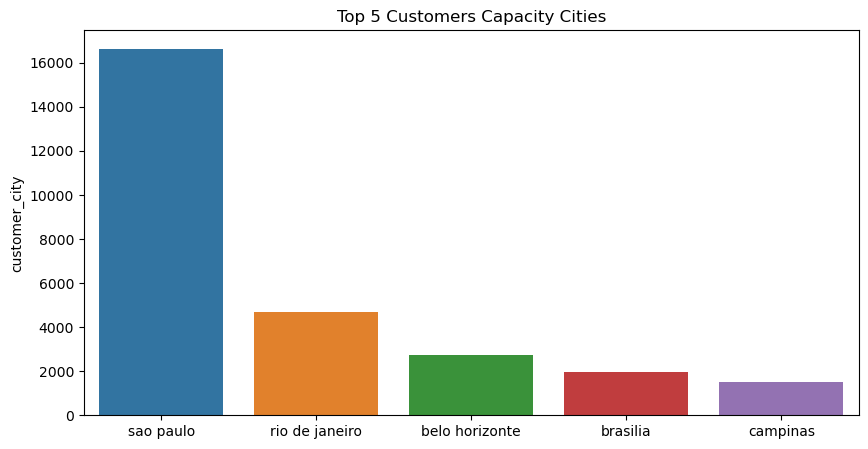

In [42]:
plt.figure(figsize=[10, 5])
sns.barplot(x = top_city.index[:5] , y =top_city.head())
plt.title('Top 5 Customers Capacity Cities');

#### So the highest city is Sao paulo

##### Plot the Top 5 Customers _state for categories using barplot 

In [43]:
top_status = df.customer_state.value_counts()
top_status.head()

SP    43768
MG    10819
RJ     9602
PR     4682
RS     3640
Name: customer_state, dtype: int64

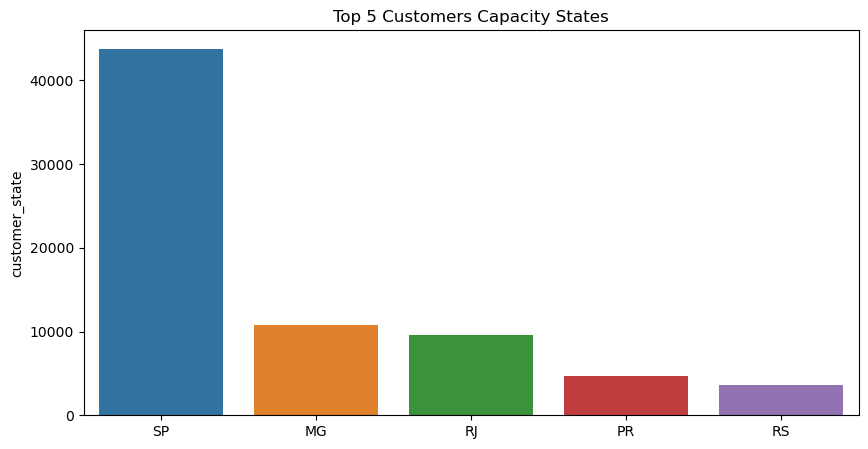

In [44]:
plt.figure(figsize=[10, 5])
sns.barplot(x = top_status.index[:5] , y=top_status.head() )
plt.title('Top 5 Customers Capacity States');

# 

#### So, the highest status is SP 

#####  Plot the Top 5 Citiy_seller categories using barplot 

In [45]:
top_city_seller = df.seller_city.value_counts()
top_city_seller

sao paulo         23088
ibitinga           6206
santo andre        2392
curitiba           2279
rio de janeiro     1955
                  ...  
minas gerais          1
viana                 1
jarinu                1
castro pires          1
belford roxo          1
Name: seller_city, Length: 550, dtype: int64

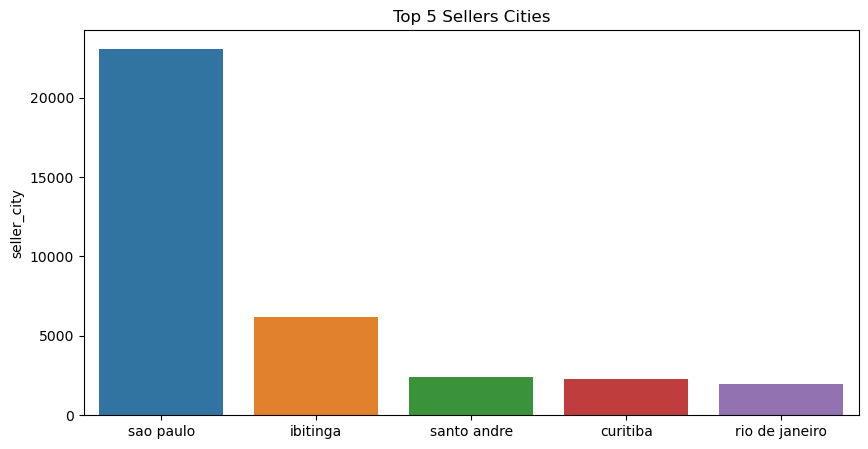

In [46]:
plt.figure(figsize=[10, 5])
sns.barplot(x =top_city_seller.index[:5] , y = top_city_seller.head())
plt.title('Top 5 Sellers Cities');

#### So, the highest status is Sao paulo same as Customers _state

#####  Plot Top 5 Sellers Capacity States for categories using bar plot

In [47]:
top_states_seller=df.seller_state.value_counts()
top_states_seller

SP    63592
MG     6526
PR     6062
RJ     3825
SC     2849
RS     1379
DF      711
BA      501
GO      359
PE      285
ES      282
MA      222
MT       76
CE       46
RN       33
MS       32
PB       13
PA        8
PI        7
SE        6
AM        1
Name: seller_state, dtype: int64

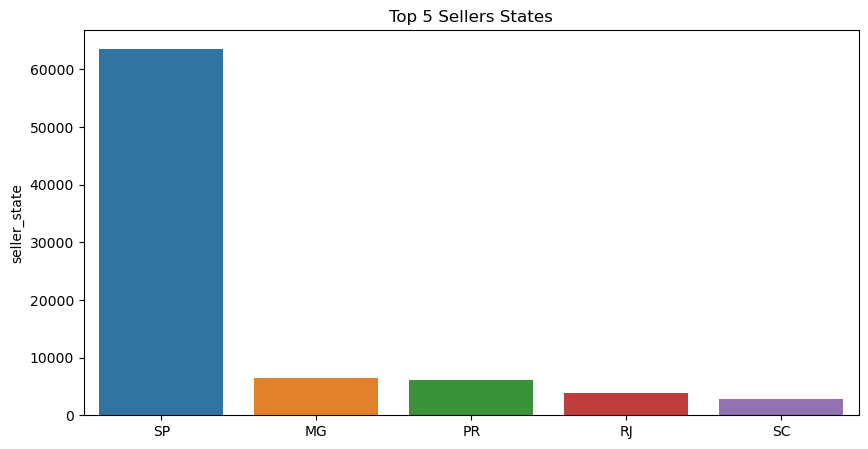

In [48]:
plt.figure(figsize=[10, 5])
sns.barplot(x = top_states_seller.index[:5] , y = top_states_seller.head())
plt.title('Top 5 Sellers States');

#### So, the highest status is SP

#####  Check the count of  "Order_Status" and drop it  Because the Extreme imbalance and lack of variance in the feature,

In [49]:
df.order_status.value_counts()

delivered    86814
canceled         1
Name: order_status, dtype: int64

In [50]:
df.drop('order_status', axis=1, inplace=True)

##### Plot the " Price " its numerical data using distribution plot

In [51]:
df.price.value_counts()

59.90      1971
69.90      1672
49.90      1488
89.90      1273
99.90      1121
           ... 
242.01        1
132.01        1
1129.34       1
1158.25       1
289.49        1
Name: price, Length: 5033, dtype: int64

<Figure size 1000x500 with 0 Axes>

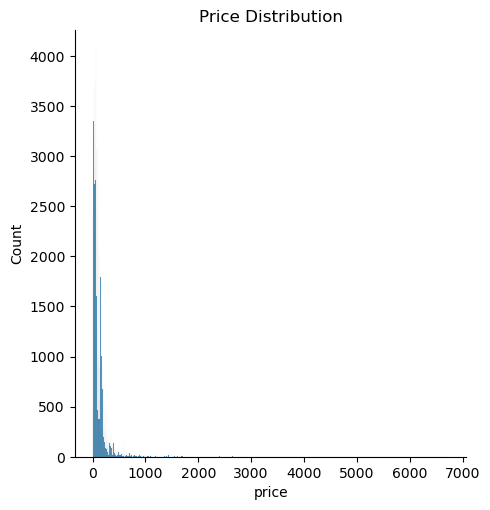

In [52]:
plt.figure(figsize=[10, 5])
sns.displot(df.price)
plt.title('Price Distribution');

##### Plot the " freight_value" its numerical data using distribution plot 

In [53]:
df.freight_value.value_counts()

15.10    2873
7.78     2223
11.85    1806
14.10    1642
7.39     1524
         ... 
48.37       1
48.68       1
29.18       1
61.10       1
68.72       1
Name: freight_value, Length: 5646, dtype: int64

<Figure size 1000x500 with 0 Axes>

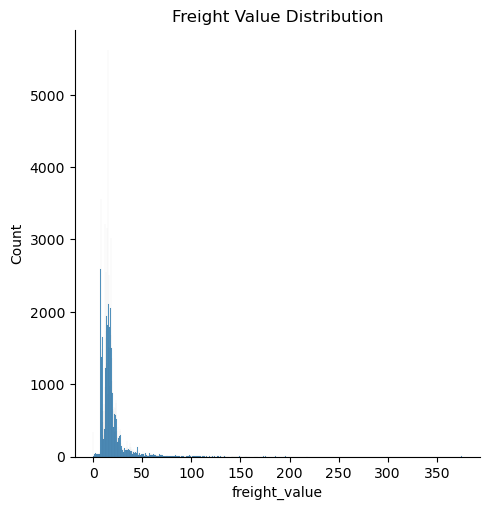

In [54]:
plt.figure(figsize=[10, 5])
sns.displot(df.freight_value)
plt.title('Freight Value Distribution');

### 

##### Plot the " product_name_lenght" its numerical data using distribution plot 

In [55]:
df.product_name_lenght.value_counts()

59.0    6410
60.0    6174
56.0    5233
58.0    5162
57.0    4817
        ... 
6.0        1
7.0        1
68.0       1
66.0       1
76.0       1
Name: product_name_lenght, Length: 65, dtype: int64

<Figure size 1000x500 with 0 Axes>

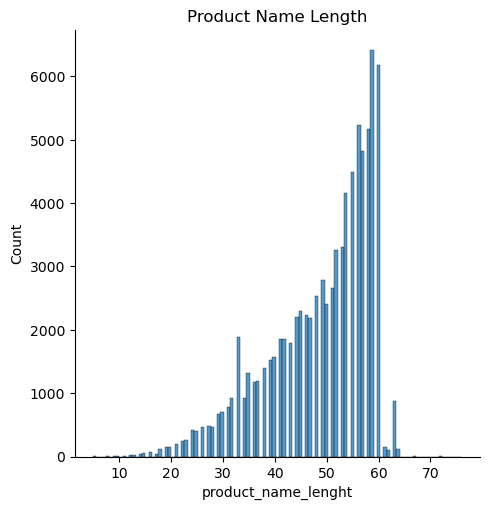

In [56]:
plt.figure(figsize=[10, 5])
sns.displot(df.product_name_lenght)
plt.title('Product Name Length');

### 

##### Plot the " product_description_lenght" its numerical data using distribution plot 

In [57]:
df.product_description_lenght.value_counts()

341.0     530
903.0     490
1893.0    483
348.0     470
245.0     465
         ... 
3106.0      1
3452.0      1
3569.0      1
3116.0      1
2367.0      1
Name: product_description_lenght, Length: 2828, dtype: int64

<Figure size 1000x500 with 0 Axes>

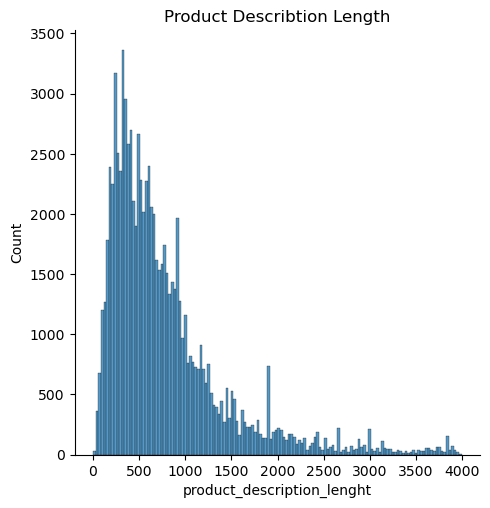

In [58]:
plt.figure(figsize=[10,5])
sns.displot(df.product_description_lenght)
plt.title('Product Describtion Length');

### 

##### Plot the " product_weight" its numerical data using distribution plot

In [59]:
df.product_weight_g.value_counts()

200.0      5311
150.0      4241
250.0      3651
300.0      3320
100.0      2686
           ... 
4517.0        1
9625.0        1
21500.0       1
4233.0        1
5217.0        1
Name: product_weight_g, Length: 1991, dtype: int64

<Figure size 1000x500 with 0 Axes>

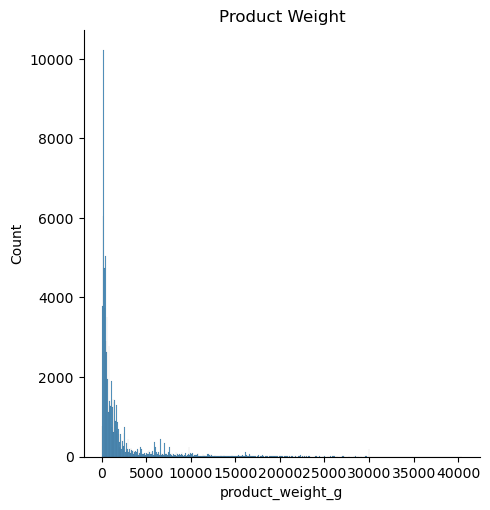

In [60]:
plt.figure(figsize=[10, 5])
sns.displot(df.product_weight_g)
plt.title('Product Weight');

###

##### Plot the "product_vol_cm3" its numerical data using distribution plot 

In [61]:
df.product_vol_cm3.value_counts()

8000.0     2086
352.0      1403
19800.0     959
640.0       930
4096.0      859
           ... 
31160.0       1
5655.0        1
98277.0       1
6200.0        1
87412.0       1
Name: product_vol_cm3, Length: 4066, dtype: int64

<Figure size 1000x500 with 0 Axes>

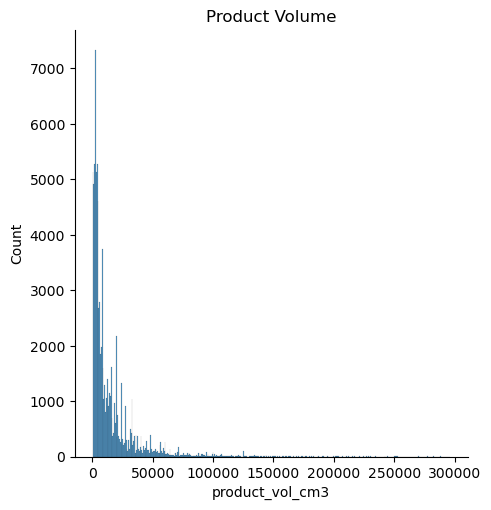

In [62]:
plt.figure(figsize=[10, 5])
sns.displot(df.product_vol_cm3)
plt.title('Product Volume');

###

#####  Plot Number of  each  per Category  which was categories in the function using barplot

In [63]:
Cat = df.product_category.value_counts()
Cat

Electronics                22377
Furniture                  21070
Entertainment              10679
Home & Garden              10302
Beauty & Health            10238
Fashion                     7279
Books & Stationery          2628
Industry & Construction     1281
Food & Drinks                961
Name: product_category, dtype: int64

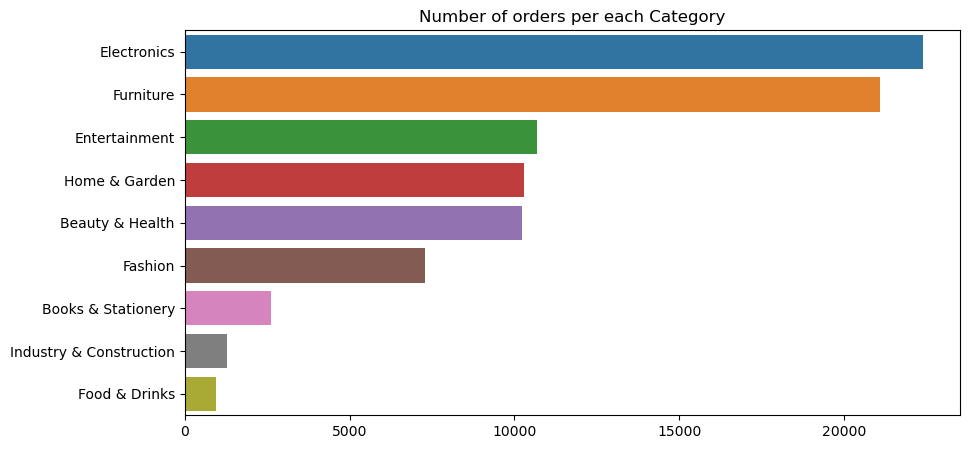

In [64]:
plt.figure(figsize=[10, 5])
sns.barplot(x = Cat.values, y= Cat.index)
plt.title('Number of orders per each Category');

#### So, Electronics is the most purchase in orders 

###

#####  Plot Product Photos Quantity using countplot for only one feature 

In [65]:
df.product_photos_qty.value_counts()

1.0     43499
2.0     17070
3.0      9724
4.0      6650
5.0      4281
6.0      3071
7.0      1221
8.0       625
10.0      278
9.0       239
11.0       65
12.0       47
13.0       22
15.0        8
17.0        8
14.0        3
18.0        3
20.0        1
Name: product_photos_qty, dtype: int64

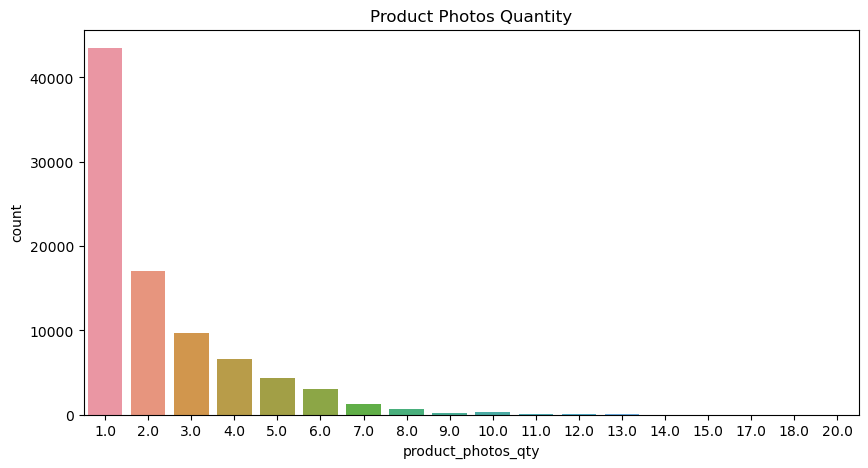

In [66]:
plt.figure(figsize=[10, 5])
sns.countplot(x = df.product_photos_qty)
plt.title('Product Photos Quantity');

###

##### Plot the Payment Type Using pie plot according the index and payment 

In [67]:
payment_index = df.payment_type.value_counts().index
print(payment_index)
payment_val=df.payment_type.value_counts().values
print(payment_val)

Index(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype='object')
[64035 16829  4625  1326]


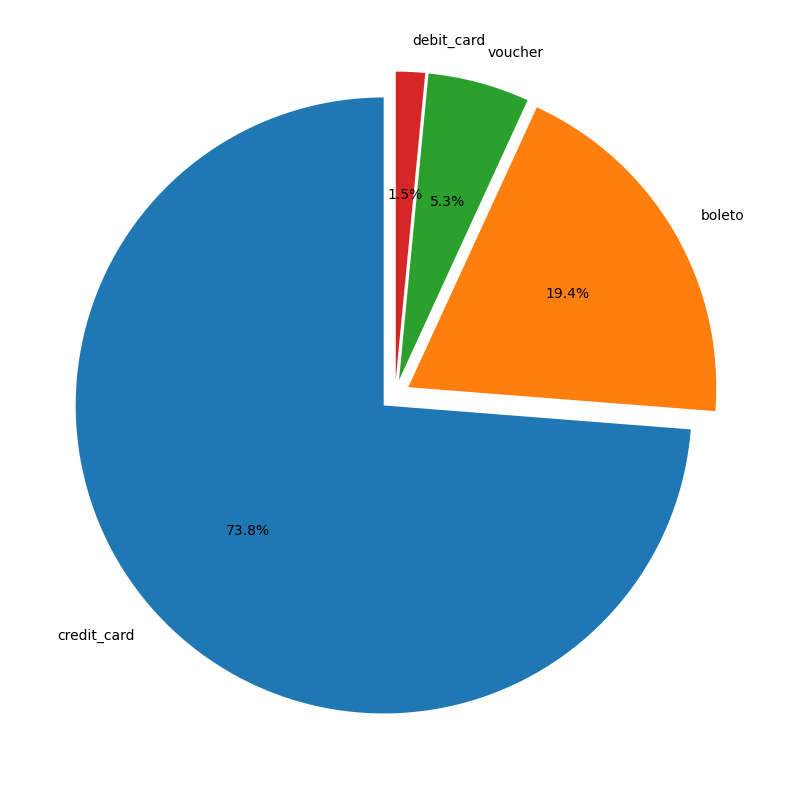

In [68]:
plt.figure(figsize=[10, 10])
plt.pie(payment_val,  explode=(0.05, 0.05, 0.05, 0.05) ,labels=payment_index , autopct='%1.1f%%', startangle=90);

#### The most payment type used is credit_card It's 73.8%

##### Check if " Payment Installments " == 0 So, its non needed

In [69]:
df[df.payment_installments == 0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category_name_english,product_category,product_vol_cm3,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
22096,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,...,housewares,Home & Garden,5819.0,22,9,7,OnTime,Neutral,Fast,Very Fast
22097,48ebb06cf56dba9d009230cc751bb195,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,...,housewares,Home & Garden,5819.0,22,9,7,OnTime,Neutral,Fast,Very Fast
73600,5e5794daaa13f73e2f1cdb4114529843,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,744bade1fcf9ff3f31d860ace076d422,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,...,telephony,Electronics,1560.0,24,5,3,OnTime,Neutral,Very Fast,Very Fast


##### Since installments can't be 0, drop the rows that Payment Installments ==0

In [70]:
# Drop indices
df.drop([22096, 22097, 73600], inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True) 

#### View the feature after droping 

In [71]:
install=df.payment_installments
install

0        2
1        1
2        6
3        6
4        6
        ..
86807    8
86808    1
86809    3
86810    2
86811    1
Name: payment_installments, Length: 86812, dtype: int64

#### The Result after droping the features and reseting the index then ploting it using count plot

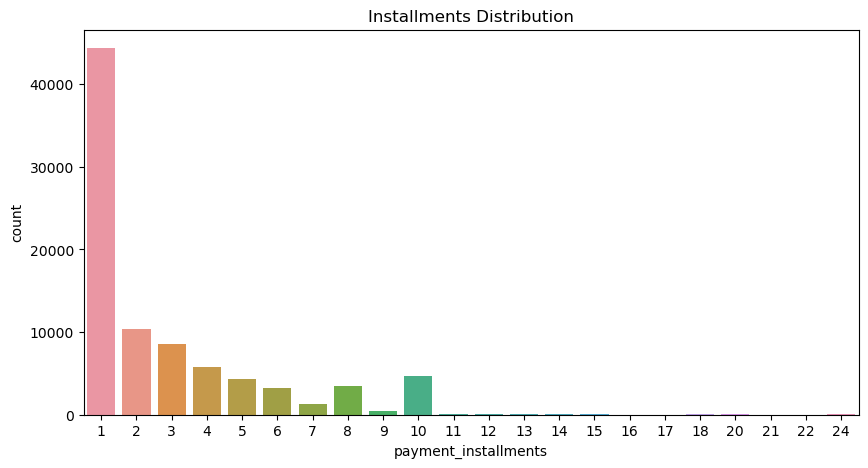

In [72]:
plt.figure(figsize=[10, 5])
sns.countplot(x=install)
plt.title('Installments Distribution');

###

###

#### So, the highest state is SP same as Customers _state

# 5.0 Data Preprocessing

# 5.1 Drop Unneccessary Features

#### Drop all id's, zip codes, datetimes, review comment and title, product length the unnessary features 

In [73]:
df.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
        'product_vol_cm3'], axis= 1, inplace= True)

####  Show the relationship between Features

C:\Temp\ipykernel_9576\1701991186.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

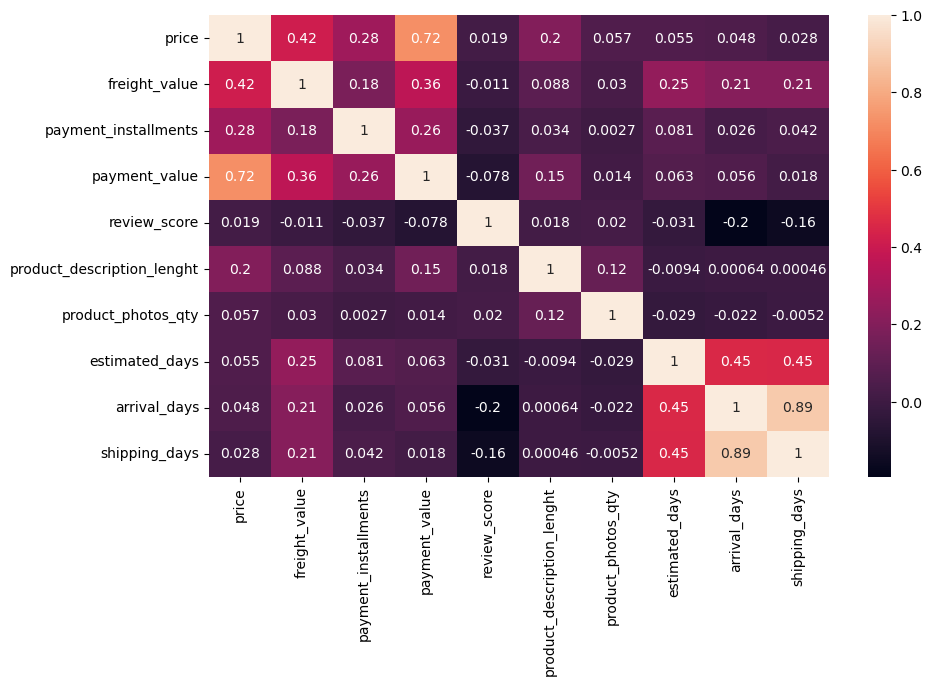

In [74]:
corr = df.corr()
plt.figure(figsize= [10, 6])
sns.heatmap(corr, annot= True)

#### Sample of data after drop Unneccessary Features

In [75]:
df.head()

,price,freight_value,payment_type,payment_installments,payment_value,review_score,product_description_lenght,product_photos_qty,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,124.99,21.88,credit_card,2,146.87,4,1141.0,1.0,20,9,2,Late,Neutral,Fast,Very Fast
1,124.99,30.71,boleto,1,155.70,4,1141.0,1.0,22,13,6,OnTime,Neutral,Fast,Very Fast
2,124.99,15.62,credit_card,6,843.66,4,1141.0,1.0,28,20,10,OnTime,Slow,Neutral,Fast
3,124.99,15.62,credit_card,6,843.66,4,1141.0,1.0,28,20,10,OnTime,Slow,Neutral,Fast
4,124.99,15.62,credit_card,6,843.66,4,1141.0,1.0,28,20,10,OnTime,Slow,Neutral,Fast


###

#### Check the count of  review_score feature to map it

In [76]:
df['review_score'].value_counts()

5    52125
4    16928
1     7990
3     7106
2     2663
Name: review_score, dtype: int64

#### Convert Review Score  from Multiclass to Binary(Mapping)

#### Title map:
####                       1 : 'Not Satisfied'
####                        2 : 'Not Satisfied'
####                        3 : 'Not Satisfied'
####                        4 : 'Satisfied'
####                        5 : 'Satisfied'

In [77]:
# encoded = {       1 : 'Not Satisfied',
#                   2 : 'Not Satisfied', 
#                   3 : 'Not Satisfied', 
#                   4 : 'Satisfied', 
#                   5 : 'Satisfied'}

# df['review_score'] = df['review_score'].map(encoded)

In [78]:
df['label']= df['review_score']
df['label'].replace([1,2,3], 'Not Satisfied', inplace=True)
df['label'].replace([4,5], 'Satisfied', inplace=True)
df.sample(10)

,price,freight_value,payment_type,payment_installments,payment_value,review_score,product_description_lenght,product_photos_qty,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate,label
24710,194.00,29.73,boleto,1,223.73,3,1926.0,1.0,15,17,1,Late,Fast,Neutral,Very Fast,Not Satisfied
29980,39.90,16.11,credit_card,5,112.02,4,207.0,1.0,26,7,6,OnTime,Slow,Very Fast,Very Fast,Satisfied
67381,8.88,8.29,credit_card,1,103.02,1,212.0,3.0,9,25,2,Late,Fast,Slow,Very Fast,Not Satisfied
72480,289.00,27.30,credit_card,1,316.30,5,1892.0,4.0,30,8,6,OnTime,Cancel the order,Fast,Very Fast,Satisfied
80187,138.90,19.07,credit_card,1,157.97,5,619.0,4.0,25,5,5,OnTime,Slow,Very Fast,Very Fast,Satisfied
58682,33.49,15.10,boleto,1,97.18,3,1087.0,1.0,22,9,7,OnTime,Neutral,Fast,Very Fast,Not Satisfied
69577,19.90,14.10,credit_card,1,34.00,5,755.0,2.0,18,13,12,OnTime,Neutral,Fast,Fast,Satisfied
64253,75.90,19.50,credit_card,1,95.40,4,868.0,8.0,21,10,8,OnTime,Neutral,Fast,Fast,Satisfied
44415,26.90,14.11,credit_card,1,41.01,5,1101.0,1.0,22,7,5,OnTime,Neutral,Very Fast,Very Fast,Satisfied
23836,73.99,77.54,boleto,1,303.06,2,1201.0,1.0,23,20,14,OnTime,Neutral,Neutral,Fast,Not Satisfied


In [79]:
df['label_num']= df['label'].replace({'Not Satisfied':0, 'Satisfied':1}).astype(int)
df.sample(10)

,price,freight_value,payment_type,payment_installments,payment_value,review_score,product_description_lenght,product_photos_qty,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate,label,label_num
22048,62.00,11.15,credit_card,3,73.15,3,1581.0,4.0,10,5,1,OnTime,Fast,Very Fast,Very Fast,Not Satisfied,0
63461,7.00,15.23,credit_card,4,44.46,5,138.0,1.0,18,12,9,OnTime,Neutral,Fast,Fast,Satisfied,1
86645,5.90,8.72,boleto,1,14.62,4,981.0,1.0,19,11,4,Late,Neutral,Fast,Very Fast,Satisfied,1
84756,126.00,38.40,credit_card,4,164.40,1,679.0,1.0,24,12,11,OnTime,Neutral,Fast,Fast,Not Satisfied,0
85614,26.00,16.11,credit_card,4,42.11,5,953.0,3.0,22,9,6,OnTime,Neutral,Fast,Very Fast,Satisfied,1
72160,29.99,13.33,credit_card,4,43.32,4,680.0,2.0,26,4,3,OnTime,Slow,Very Fast,Very Fast,Satisfied,1
6321,23.90,16.36,credit_card,2,40.26,5,371.0,1.0,13,6,5,OnTime,Fast,Very Fast,Very Fast,Satisfied,1
62136,16.90,7.78,boleto,1,49.36,5,956.0,1.0,19,19,13,OnTime,Neutral,Neutral,Fast,Satisfied,1
73315,22.99,11.85,credit_card,3,34.84,5,259.0,3.0,23,5,4,OnTime,Neutral,Very Fast,Very Fast,Satisfied,1
21136,75.00,16.78,credit_card,4,91.78,3,448.0,4.0,22,14,13,OnTime,Neutral,Fast,Fast,Not Satisfied,0


#### View the feature

In [80]:
# df['review_score']

#### so this is the Y my target

###

#### Store all data in x except the target store it in y 

In [81]:
df.drop(["label" , "review_score"] ,axis=1, inplace=True )

In [82]:
X = df.drop('label_num', axis=1) 
y = df['label_num']

In [83]:
X.head()

,price,freight_value,payment_type,payment_installments,payment_value,product_description_lenght,product_photos_qty,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,124.99,21.88,credit_card,2,146.87,1141.0,1.0,20,9,2,Late,Neutral,Fast,Very Fast
1,124.99,30.71,boleto,1,155.70,1141.0,1.0,22,13,6,OnTime,Neutral,Fast,Very Fast
2,124.99,15.62,credit_card,6,843.66,1141.0,1.0,28,20,10,OnTime,Slow,Neutral,Fast
3,124.99,15.62,credit_card,6,843.66,1141.0,1.0,28,20,10,OnTime,Slow,Neutral,Fast
4,124.99,15.62,credit_card,6,843.66,1141.0,1.0,28,20,10,OnTime,Slow,Neutral,Fast


#### Handling Nominal Features ( One Hot Encoding ) ,converting text to num

In [84]:
X = pd.get_dummies(X, drop_first=True) 

#### Split Data into Train & Test 80% train and 20%test to find the best accuracy

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=101)#split is 80% train and 20% test

###

### Feature Selection

#### Select the best 9 Features and learn the model to predict them  with transform of the  train and test nd store them in variables

In [86]:
from sklearn.feature_selection import SelectKBest
fs = SelectKBest( k= 3) 
z=fs.fit(x_train, y_train)  
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [87]:
filter = fs.get_support()
features = np.array(X.columns)

print("All")
print(features)

print("/n")

print("Selected best 3 :")
print(features[filter])
print(z)

All
['price' 'freight_value' 'payment_installments' 'payment_value'
 'product_description_lenght' 'product_photos_qty' 'estimated_days'
 'arrival_days' 'shipping_days' 'payment_type_credit_card'
 'payment_type_debit_card' 'payment_type_voucher'
 'seller_to_carrier_status_OnTime' 'estimated_delivery_rate_Fast'
 'estimated_delivery_rate_Neutral' 'estimated_delivery_rate_Slow'
 'estimated_delivery_rate_Very Fast' 'arrival_delivery_rate_Fast'
 'arrival_delivery_rate_Neutral' 'arrival_delivery_rate_Slow'
 'arrival_delivery_rate_Very Fast' 'shipping_delivery_rate_Fast'
 'shipping_delivery_rate_Neutral' 'shipping_delivery_rate_Slow'
 'shipping_delivery_rate_Very Fast']
/n
Selected best 3 :
['arrival_days' 'shipping_days' 'arrival_delivery_rate_Slow']
SelectKBest(k=3)


In [88]:
X[["arrival_days" , "shipping_days","arrival_delivery_rate_Slow"]]

,arrival_days,shipping_days,arrival_delivery_rate_Slow
0,9,2,0
1,13,6,0
2,20,10,0
3,20,10,0
4,20,10,0
...,...,...,...
86807,6,4,0
86808,9,6,0
86809,8,7,0
86810,9,7,0


In [106]:
X.head()

,price,freight_value,payment_installments,payment_value,product_description_lenght,product_photos_qty,estimated_days,arrival_days,shipping_days,payment_type_credit_card,...,estimated_delivery_rate_Slow,estimated_delivery_rate_Very Fast,arrival_delivery_rate_Fast,arrival_delivery_rate_Neutral,arrival_delivery_rate_Slow,arrival_delivery_rate_Very Fast,shipping_delivery_rate_Fast,shipping_delivery_rate_Neutral,shipping_delivery_rate_Slow,shipping_delivery_rate_Very Fast
0,124.99,21.88,2,146.87,1141.0,1.0,20,9,2,1,...,0,0,1,0,0,0,0,0,0,1
1,124.99,30.71,1,155.70,1141.0,1.0,22,13,6,0,...,0,0,1,0,0,0,0,0,0,1
2,124.99,15.62,6,843.66,1141.0,1.0,28,20,10,1,...,1,0,0,1,0,0,1,0,0,0
3,124.99,15.62,6,843.66,1141.0,1.0,28,20,10,1,...,1,0,0,1,0,0,1,0,0,0
4,124.99,15.62,6,843.66,1141.0,1.0,28,20,10,1,...,1,0,0,1,0,0,1,0,0,0


In [107]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label_num, dtype: int32

#### convert this variable to dataframe

In [89]:
x_train_fs = pd.DataFrame(x_train_fs)
x_test_fs =  pd.DataFrame(x_test_fs)

### 

### 5.3 Feature Scaling 

#### we do scaler to transfer all features to numbers that are close to each other - to make it easier for me to learning

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

##### Convert Array to Dataframe

In [91]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

###

### 5.4 Handling Imbalance

##### Check imbalance percentage

In [92]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2) #presentage of imbalance

1    79.49
0    20.51
Name: label_num, dtype: float64

##### Use SMOTE for handling imbalance to make it equal 50%  and 50% in y

In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

##### After  handling imbalance by testing handling imbalance percentage

In [94]:
round((y_train_resampled.value_counts() / y_train_resampled.shape[0]) * 100, 2) 

1    50.0
0    50.0
Name: label_num, dtype: float64

In [95]:
x_train_resampled.head()

,0,1,2
0,-0.537059,-1.179391,-0.161108
1,-1.559613,-1.179391,-0.161108
2,1.848902,1.827107,-0.161108
3,-0.025781,-0.051954,-0.161108
4,-0.196207,-0.615673,-0.161108


In [108]:
y_train_resampled.head()

0    1
1    0
2    0
3    1
4    1
Name: label_num, dtype: int32

### 

# 6.0 Modeling

#### Decision Tree (DT)
#### Random Forest (RF)
#### Naive Bayes (GaussianNB)
#### K-Nearest Neighbors (KNN)
#### Stochastic Gradient Descent (SGD)
#### Support Vector Machine (SVC)

###

### Decision Tree

### 1 -  Model Training: 

#### dt = DecisionTreeClassifier(): Initializes a Decision Tree classifier.
- dt.fit(x_train_resampled, y_train_resampled): Trains the classifier on the resampled training data x_train_resampled with corresponding labels y_train_resampled.

### 2 - Making Predictions:
- pred_dt = dt.predict(x_test_scaled): Uses the trained model to predict the labels for the scaled test data x_test_scaled.

### 3 - Calculating Accuracy:
- Acc_dt = round(accuracy_score(y_test, pred_dt)*100, 2): Computes the accuracy of the classifier by comparing the predicted labels pred_dt with the true labels y_test. The accuracy_score function calculates the accuracy, and the result is rounded to two decimal places and stored in Acc_dt.

### 4 - Confusion Matrix:
 - con_mat = confusion_matrix(y_test, pred_dt): Computes the confusion matrix using the true labels y_test and the predicted labels pred_dt.
 
### 5 - Confusion Matrix Analysis:
- df_cnf_matrix and df_cnf_matrix_percent: DataFrames are created to display the confusion matrix in numbers and as a percentage, respectively.
- The confusion matrices are displayed using heatmaps with the help of the sns.heatmap function.

### 6 - Classification Report:
- classification_report(y_test, dt.predict(x_test_scaled)): Generates a classification report, including metrics such as precision, recall, F1-score, and support for each class.

Decision Tree:
--------------------
Accuracy = 68.0

DT Confusion Matrix in Numbers
[[ 1429  2086]
 [ 3471 10377]]

DT Confusion Matrix in Percentage
[[0.40654339 0.59345661]
 [0.25064991 0.74935009]]



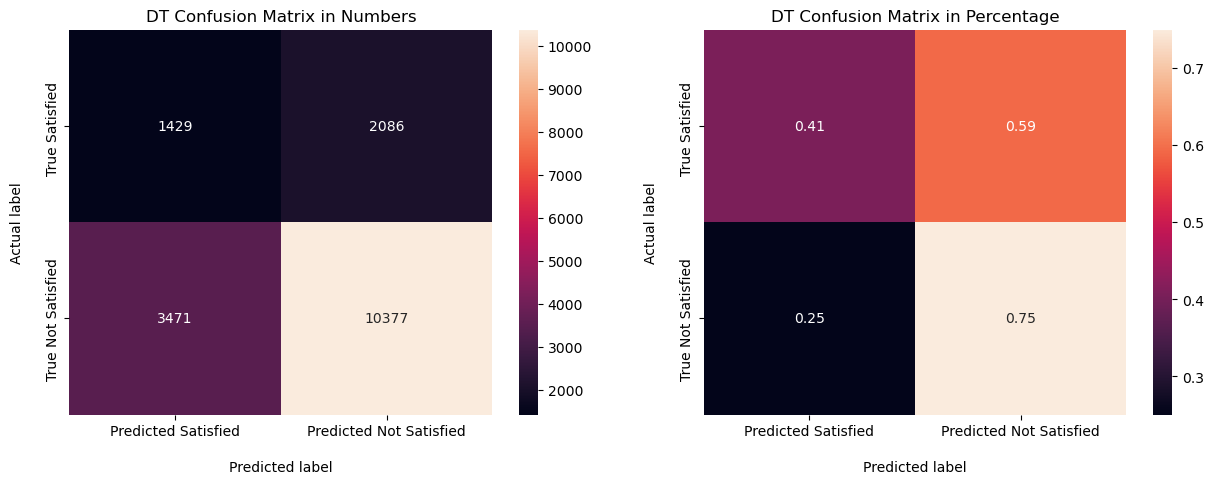


DT classification_report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.29      0.41      0.34      3515
           1       0.83      0.75      0.79     13848

    accuracy                           0.68     17363
   macro avg       0.56      0.58      0.56     17363
weighted avg       0.72      0.68      0.70     17363



In [96]:
dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled) 

pred_dt=dt.predict(x_test_scaled)

Acc_dt = round(accuracy_score(y_test,pred_dt)*100, 2)

print("Decision Tree:")
print("--------------------")
print("Accuracy =", Acc_dt)
print("")

class_names = ['Satisfied', 'Not Satisfied']

con_mat=confusion_matrix(y_test,pred_dt)

print ('DT Confusion Matrix in Numbers')
print (con_mat)
print ('')

cnf_matrix_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

print ('DT Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Satisfied ', 'True Not Satisfied']
predicted_class_names = ['Predicted Satisfied', 'Predicted Not Satisfied']

df_cnf_matrix = pd.DataFrame(con_mat, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True,fmt='g')
plt.title('DT Confusion Matrix in Numbers')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label') 

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
plt.title('DT Confusion Matrix in Percentage')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label')  

plt.show()

print('')
print('DT classification_report:')
print('-'*100)
print(classification_report(y_test, dt.predict(x_test_scaled)))


### RandomForest

### 1 -  Model Training: 

#### RF = RandomForestClassifier(): Initializes a Random Forest classifier.
- RF.fit(x_train_resampled, y_train_resampled)
- RF.fit(x_train_resampled, y_train_resampled): Trains the classifier on the resampled training data x_train_resampled with corresponding labels y_train_resampled. 

### 2 - Making Predictions:
- pred_RF = RF.predict(x_test_scaled): Uses the trained model to predict the labels for the scaled test data x_test_scaled.

### 3 - Calculating Accuracy:
- Acc_RF = round(accuracy_score(y_test, pred_RF)*100, 2): Computes the accuracy of the classifier by comparing the predicted labels pred_RF with the true labels y_test. The accuracy_score function calculates the accuracy, and the result is rounded to two decimal places and stored in Acc_RF

### 4 - Confusion Matrix:
 - con_mat = confusion_matrix(y_test, pred_RF): Computes the confusion matrix using the true labels y_test and the predicted labels pred_RF.
 
### 5 - Confusion Matrix Analysis:
- Similar to the previous code snippet, the confusion matrix is displayed both in numbers and as a percentage using heatmaps and DataFrames.
### 6 - Classification Report:
- classification_report(y_test, RF.predict(x_test_scaled)): Generates a classification report, including metrics such as precision, recall, F1-score, and support for each class.

Random Forest Classifier:
--------------------
Accuracy = 68.34

RF Confusion Matrix in Numbers
[[ 1410  2105]
 [ 3392 10456]]

RF Confusion Matrix in Percentage
[[0.40113798 0.59886202]
 [0.24494512 0.75505488]]



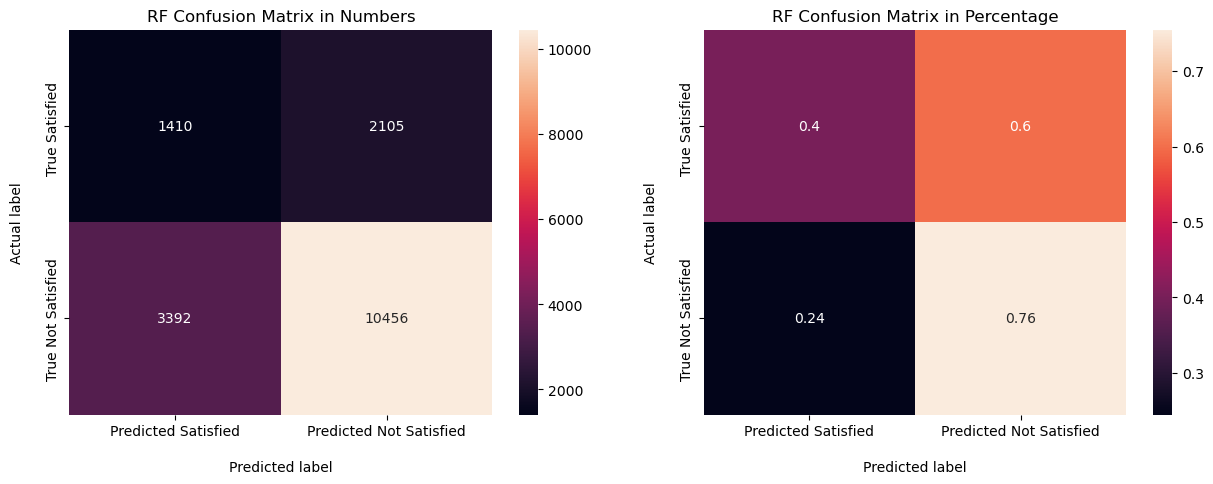


RF classification_report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.29      0.40      0.34      3515
           1       0.83      0.76      0.79     13848

    accuracy                           0.68     17363
   macro avg       0.56      0.58      0.57     17363
weighted avg       0.72      0.68      0.70     17363



In [97]:
RF = RandomForestClassifier()
RF.fit(x_train_resampled, y_train_resampled)

pred_RF=RF.predict(x_test_scaled)

Acc_RF = round(accuracy_score(y_test,pred_RF)*100, 2)

print("Random Forest Classifier:")
print("--------------------")
print("Accuracy =", Acc_RF)
print("")

class_names = ['Satisfied', 'Not Satisfied']

con_mat=confusion_matrix(y_test,pred_RF)

print ('RF Confusion Matrix in Numbers')
print (con_mat)
print ('')

cnf_matrix_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

print ('RF Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Satisfied ', 'True Not Satisfied']
predicted_class_names = ['Predicted Satisfied', 'Predicted Not Satisfied']

df_cnf_matrix = pd.DataFrame(con_mat, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True,fmt='g')
plt.title('RF Confusion Matrix in Numbers')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label') 

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
plt.title('RF Confusion Matrix in Percentage')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label')  

plt.show()

print('')
print('RF classification_report:')
print('-'*100)
print(classification_report(y_test, RF.predict(x_test_scaled)))


### GaussianNB

### 1 -  Model Training: 

#### gnb = GaussianNB(): Initializes a GaussianNB .
- gnb = GaussianNB(): Initializes a Gaussian Naive Bayes classifier.
- gnb.fit(x_train_resampled, y_train_resampled): Trains the classifier on the resampled training data x_train_resampled with corresponding labels y_train_resampled.
### 2 - Making Predictions:
- pred_gnb = gnb.predict(x_test_scaled): Uses the trained model to predict the labels for the scaled test data x_test_scaled.

### 3 - Calculating Accuracy:
- Acc_gnb = round(accuracy_score(y_test, pred_gnb)*100, 2): Computes the accuracy of the classifier by comparing the predicted labels pred_gnb with the true labels y_test. The accuracy_score function calculates the accuracy, and the result is rounded to two decimal places and stored in Acc_gnb.

### 4 - Confusion Matrix:
 - con_mat = confusion_matrix(y_test, pred_gnb): Computes the confusion matrix using the true labels y_test and the predicted labels pred_gnb.
 
### 5 - Confusion Matrix Analysis:
- Similar to the previous code snippets, the confusion matrix is displayed both in numbers and as a percentage using heatmaps and DataFrames.
### 6 - Classification Report:
- classification_report(y_test, gnb.predict(x_test_scaled)): Generates a classification report, including metrics such as precision, recall, F1-score, and support for each class.

GaussianNB:
--------------------
Accuracy = 76.12

gnb Confusion Matrix in Numbers
[[  788  2727]
 [ 1420 12428]]

gnb Confusion Matrix in Percentage
[[0.22418208 0.77581792]
 [0.10254188 0.89745812]]



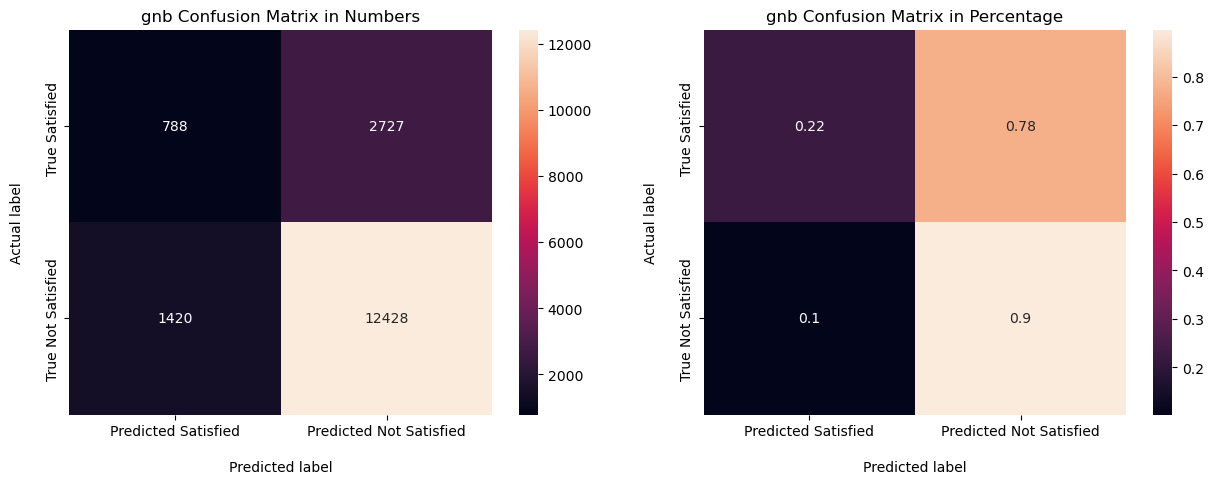


gnb classification_report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.36      0.22      0.28      3515
           1       0.82      0.90      0.86     13848

    accuracy                           0.76     17363
   macro avg       0.59      0.56      0.57     17363
weighted avg       0.73      0.76      0.74     17363



In [98]:
gnb = GaussianNB()
gnb.fit(x_train_resampled, y_train_resampled)

pred_gnb=gnb.predict(x_test_scaled)

Acc_gnb = round(accuracy_score(y_test,pred_gnb)*100, 2)

print("GaussianNB:")
print("--------------------")
print("Accuracy =", Acc_gnb)
print("")

class_names = ['Satisfied', 'Not Satisfied']

con_mat=confusion_matrix(y_test,pred_gnb)

print ('gnb Confusion Matrix in Numbers')
print (con_mat)
print ('')

cnf_matrix_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

print ('gnb Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Satisfied ', 'True Not Satisfied']
predicted_class_names = ['Predicted Satisfied', 'Predicted Not Satisfied']

df_cnf_matrix = pd.DataFrame(con_mat, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True,fmt='g')
plt.title('gnb Confusion Matrix in Numbers')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label') 

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
plt.title('gnb Confusion Matrix in Percentage')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label')  

plt.show()

print('')
print('gnb classification_report:')
print('-'*100)
print(classification_report(y_test, gnb.predict(x_test_scaled)))


### KNN

### 1 -  Model Training: 

#### KNN = KNeighborsClassifier(): Initializes a  KNeighborsClassifier .
- KNN = KNeighborsClassifier(): Initializes a K-Nearest Neighbors classifier.
- KNN.fit(x_train_resampled, y_train_resampled): Trains the classifier on the resampled training data x_train_resampled with corresponding labels y_train_resampled.
### 2 - Making Predictions:
- pred_KNN = KNN.predict(x_test_scaled): Uses the trained model to predict the labels for the scaled test data x_test_scaled.

### 3 - Calculating Accuracy:
- Acc_KNN = round(accuracy_score(y_test, pred_KNN)*100, 2): Computes the accuracy of the classifier by comparing the predicted labels pred_KNN with the true labels y_test. The accuracy_score function calculates the accuracy, and the result is rounded to two decimal places and stored in Acc_KNN.

### 4 - Confusion Matrix:
 - con_mat = confusion_matrix(y_test, pred_KNN): Computes the confusion matrix using the true labels y_test and the predicted labels pred_KNN.
 
### 5 - Confusion Matrix Analysis:
- Similar to the previous code snippets, the confusion matrix is displayed both in numbers and as a percentage using heatmaps and DataFrames.
### 6 - Classification Report:
- classification_report(y_test, KNN.predict(x_test_scaled)): Generates a classification report, including metrics such as precision, recall, F1-score, and support for each class.

K-Nearest Neighbors:
--------------------
Accuracy = 76.61

KNN Confusion Matrix in Numbers
[[  508  3007]
 [ 1054 12794]]

KNN Confusion Matrix in Percentage
[[0.14452347 0.85547653]
 [0.07611207 0.92388793]]



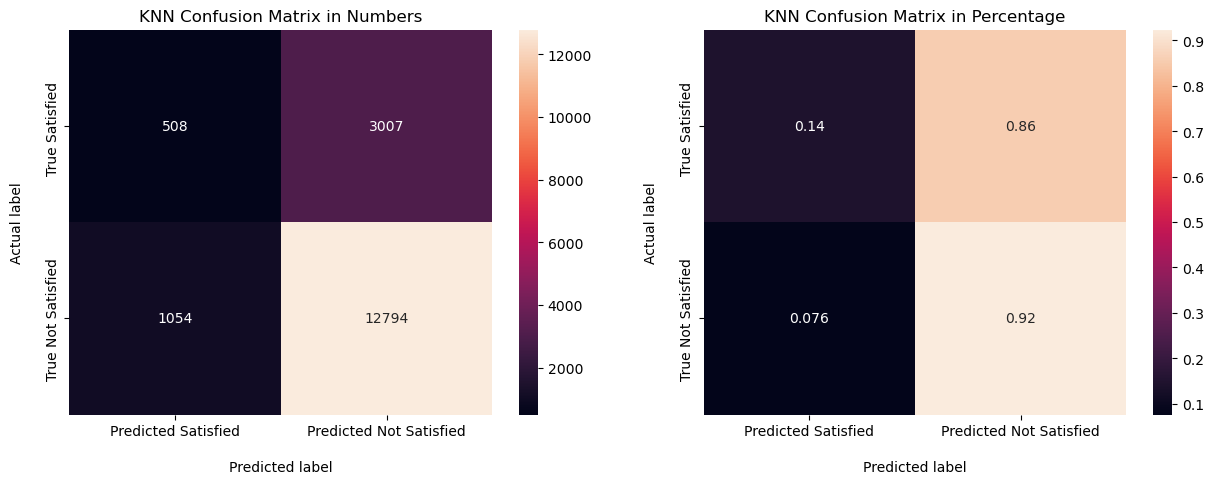


KNN classification_report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.14      0.20      3515
           1       0.81      0.92      0.86     13848

    accuracy                           0.77     17363
   macro avg       0.57      0.53      0.53     17363
weighted avg       0.71      0.77      0.73     17363



In [99]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_resampled, y_train_resampled)

pred_KNN=KNN.predict(x_test_scaled)

Acc_KNN = round(accuracy_score(y_test,pred_KNN)*100, 2)

print("K-Nearest Neighbors:")
print("--------------------")
print("Accuracy =", Acc_KNN)
print("")

class_names = ['Satisfied', 'Not Satisfied']

con_mat=confusion_matrix(y_test,pred_KNN)

print ('KNN Confusion Matrix in Numbers')
print (con_mat)
print ('')

cnf_matrix_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

print ('KNN Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Satisfied ', 'True Not Satisfied']
predicted_class_names = ['Predicted Satisfied', 'Predicted Not Satisfied']

df_cnf_matrix = pd.DataFrame(con_mat, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)
    
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True,fmt='g')
plt.title('KNN Confusion Matrix in Numbers')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label') 

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
plt.title('KNN Confusion Matrix in Percentage')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label')  

plt.show()

print('')
print('KNN classification_report:')
print('-'*100)
print(classification_report(y_test, KNN.predict(x_test_scaled)))


### Stochastic Gradient Descent Classifier

### 1 -  Model Training: 

#### SGD = SGDClassifier(): Initializes a Stochastic Gradient Descent Classifier.
- SGD = SGDClassifier(): Initializes a Stochastic Gradient Descent classifier.
- SGD.fit(x_train_resampled, y_train_resampled): Trains the classifier on the resampled training data x_train_resampled with corresponding labels y_train_resampled.

### 2 - Making Predictions:
- pred_SGD = SGD.predict(x_test_scaled): Uses the trained model to predict the labels for the scaled test data x_test_scaled.

### 3 - Calculating Accuracy:
- Acc_SGD = round(accuracy_score(y_test, pred_SGD)*100, 2): Computes the accuracy of the classifier by comparing the predicted labels pred_SGD with the true labels y_test. The accuracy_score function calculates the accuracy, and the result is rounded to two decimal places and stored in Acc_SGD.

### 4 - Confusion Matrix:
 - con_mat = confusion_matrix(y_test, pred_SGD): Computes the confusion matrix using the true labels y_test and the predicted labels pred_SGD
 
### 5 - Confusion Matrix Analysis:
- Similar to the previous code snippets, the confusion matrix is displayed both in numbers and as a percentage using heatmaps and DataFrames.
### 6 - Classification Report:
- classification_report(y_test, SGD.predict(x_test_scaled)): Generates a classification report, including metrics such as precision, recall, F1-score, and support for each class.

Stochastic Gradient Descent:
--------------------
Accuracy = 66.43

SGD Confusion Matrix in Numbers
[[ 1513  2002]
 [ 3827 10021]]

SGD Confusion Matrix in Percentage
[[0.43044097 0.56955903]
 [0.2763576  0.7236424 ]]



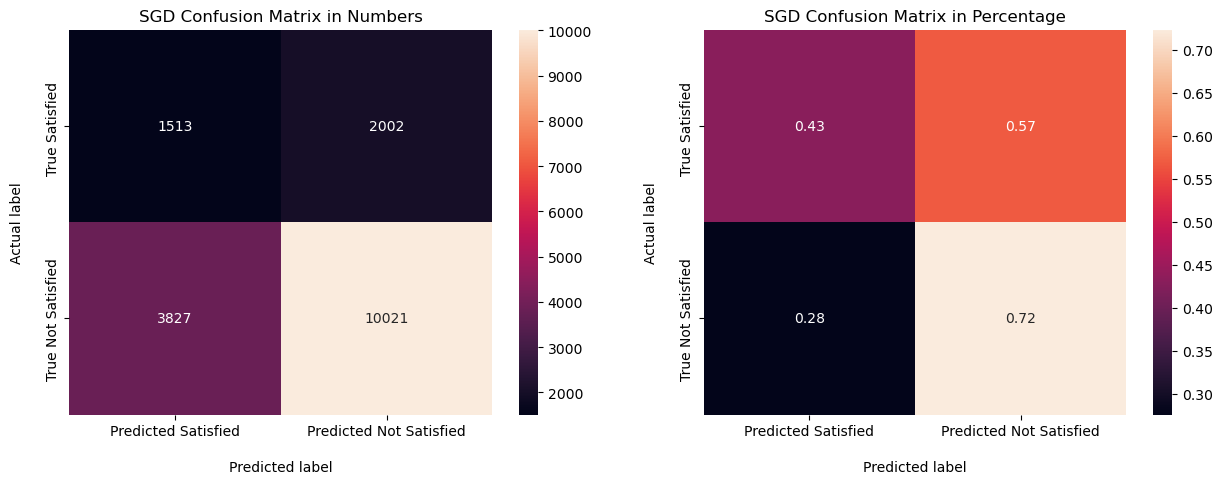


SGD classification_report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.28      0.43      0.34      3515
           1       0.83      0.72      0.77     13848

    accuracy                           0.66     17363
   macro avg       0.56      0.58      0.56     17363
weighted avg       0.72      0.66      0.69     17363



In [100]:
SGD = SGDClassifier()
SGD.fit(x_train_resampled, y_train_resampled)

pred_SGD=SGD.predict(x_test_scaled)

Acc_SGD = round(accuracy_score(y_test,pred_SGD)*100, 2)

print("Stochastic Gradient Descent:")
print("--------------------")
print("Accuracy =", Acc_SGD)
print("")

class_names = ['Satisfied', 'Not Satisfied']

con_mat=confusion_matrix(y_test,pred_SGD)

print ('SGD Confusion Matrix in Numbers')
print (con_mat)
print ('')

cnf_matrix_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

print ('SGD Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Satisfied ', 'True Not Satisfied']
predicted_class_names = ['Predicted Satisfied', 'Predicted Not Satisfied']

df_cnf_matrix = pd.DataFrame(con_mat, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True,fmt='g')
plt.title('SGD Confusion Matrix in Numbers')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label') 

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
plt.title('SGD Confusion Matrix in Percentage')
plt.ylabel('Actual label\n')
plt.xlabel('\nPredicted label')  

plt.show()

print('')
print('SGD classification_report:')
print('-'*100)
print(classification_report(y_test, SGD.predict(x_test_scaled)))


# Model Evaluation

### stored the accuracy of each model and converted them to dataframe - sort models according largest

In [101]:
models = pd.DataFrame({ 'Model': ['KNN', 'DT', 'RF', 'SGD', 'GNB'],
                       'Score': [Acc_KNN, Acc_dt, Acc_RF, Acc_SGD, Acc_gnb]
                     })
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,76.61
4,GNB,76.12
2,RF,68.34
1,DT,68.00
3,SGD,66.43


###

###  Classification Report for each model - including metrics such as precision, recall, F1-score, and support for each model.

In [102]:
print('KNN classification Report:')
print('--'*30)
print(classification_report(y_test, KNN.predict(x_test_scaled)))
print('--'*30)

print('DT classification Report:')
print('--'*30)
print(classification_report(y_test, dt.predict(x_test_scaled)))
print('--'*30)

print('RF classification Report:')
print('--'*30)
print(classification_report(y_test, RF.predict(x_test_scaled)))
print('--'*30)

print('GNB classification Report:')
print('--'*30)
print(classification_report(y_test, gnb.predict(x_test_scaled)))
print('--'*30)

print('SGD classification Report:')
print('--'*30)
print(classification_report(y_test, SGD.predict(x_test_scaled)))
print('--'*30)

KNN classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.14      0.20      3515
           1       0.81      0.92      0.86     13848

    accuracy                           0.77     17363
   macro avg       0.57      0.53      0.53     17363
weighted avg       0.71      0.77      0.73     17363

------------------------------------------------------------
DT classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.29      0.41      0.34      3515
           1       0.83      0.75      0.79     13848

    accuracy                           0.68     17363
   macro avg       0.56      0.58      0.56     17363
weighted avg       0.72      0.68      0.70     17363

------------------------------------------------------------
RF classification Report:
-----------------------

In [103]:
import joblib
joblib.dump(KNN, "D:/Models/KNN_2_june_3.pkl")

['D:/Models/KNN_2_june_3.pkl']